In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09ce6e7d907aa868638ac3380bcb6753


In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nelson bay
Processing Record 2 of Set 1 | mrirt
City not found. Skipping...
Processing Record 3 of Set 1 | wanning
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | lagos
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | buchanan
Processing Record 11 of Set 1 | airai
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | esperance
Processing Record 15 of Set 1 | grants pass
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | sambava
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 22 of Set 1 | narsaq
Processing Record 23 of S

Processing Record 38 of Set 4 | hobart
Processing Record 39 of Set 4 | rio cuarto
Processing Record 40 of Set 4 | sabha
Processing Record 41 of Set 4 | te anau
Processing Record 42 of Set 4 | jumla
Processing Record 43 of Set 4 | rorvik
Processing Record 44 of Set 4 | prado
Processing Record 45 of Set 4 | san quintin
Processing Record 46 of Set 4 | gat
Processing Record 47 of Set 4 | half moon bay
Processing Record 48 of Set 4 | puerto concordia
Processing Record 49 of Set 4 | rocha
Processing Record 50 of Set 4 | marienburg
Processing Record 1 of Set 5 | nizhniy tsasuchey
Processing Record 2 of Set 5 | tura
Processing Record 3 of Set 5 | axim
Processing Record 4 of Set 5 | mehamn
Processing Record 5 of Set 5 | nikolskoye
Processing Record 6 of Set 5 | sabang
Processing Record 7 of Set 5 | beringovskiy
Processing Record 8 of Set 5 | conceicao do araguaia
Processing Record 9 of Set 5 | mahebourg
Processing Record 10 of Set 5 | kroya
Processing Record 11 of Set 5 | marcona
City not found

Processing Record 24 of Set 8 | inhambane
Processing Record 25 of Set 8 | porto novo
Processing Record 26 of Set 8 | nowy sacz
Processing Record 27 of Set 8 | burns lake
Processing Record 28 of Set 8 | loubomo
Processing Record 29 of Set 8 | huinan
Processing Record 30 of Set 8 | mattru
Processing Record 31 of Set 8 | saint-louis
Processing Record 32 of Set 8 | matam
Processing Record 33 of Set 8 | progreso
Processing Record 34 of Set 8 | meyungs
City not found. Skipping...
Processing Record 35 of Set 8 | calape
Processing Record 36 of Set 8 | mantua
Processing Record 37 of Set 8 | kupang
Processing Record 38 of Set 8 | tara
Processing Record 39 of Set 8 | russell
Processing Record 40 of Set 8 | los llanos de aridane
Processing Record 41 of Set 8 | sitka
Processing Record 42 of Set 8 | volnovakha
Processing Record 43 of Set 8 | khorol
Processing Record 44 of Set 8 | talawdi
City not found. Skipping...
Processing Record 45 of Set 8 | inuvik
Processing Record 46 of Set 8 | bathsheba
Proc

Processing Record 16 of Set 12 | poum
Processing Record 17 of Set 12 | nouadhibou
Processing Record 18 of Set 12 | chabahar
Processing Record 19 of Set 12 | srednekolymsk
Processing Record 20 of Set 12 | druten
Processing Record 21 of Set 12 | chicama
Processing Record 22 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 23 of Set 12 | la ronge
Processing Record 24 of Set 12 | paradwip
City not found. Skipping...
Processing Record 25 of Set 12 | krasnoyarskaya
Processing Record 26 of Set 12 | alyangula
Processing Record 27 of Set 12 | lazaro cardenas
Processing Record 28 of Set 12 | bar harbor
Processing Record 29 of Set 12 | aykhal
Processing Record 30 of Set 12 | beaupre
Processing Record 31 of Set 12 | gueugnon
Processing Record 32 of Set 12 | vestmannaeyjar
Processing Record 33 of Set 12 | balakhta
Processing Record 34 of Set 12 | wilson
Processing Record 35 of Set 12 | severo-yeniseyskiy
Processing Record 36 of Set 12 | skalistyy
City not found. Skipping...
------

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nelson Bay,-32.7167,152.1500,72.10,61,0,3.00,AU,2022-11-08 23:00:41
1,Wanning,18.8003,110.3967,74.71,92,91,8.05,CN,2022-11-08 23:00:42
2,New Norfolk,-42.7826,147.0587,69.71,53,93,1.99,AU,2022-11-08 23:00:42
3,Vaini,-21.2000,-175.2000,76.41,73,71,17.58,TO,2022-11-08 23:00:43
4,Leningradskiy,69.3833,178.4167,17.17,87,100,26.33,RU,2022-11-08 22:57:33
5,Port Alfred,-33.5906,26.8910,64.18,93,62,0.85,ZA,2022-11-08 23:00:29
6,Lagos,6.5833,3.7500,80.92,92,47,5.03,NG,2022-11-08 22:59:03
7,Buchanan,5.8808,-10.0467,77.22,88,77,4.72,LR,2022-11-08 23:00:43
8,Airai,-8.9266,125.4092,66.87,69,68,1.14,TL,2022-11-08 23:00:44
9,Kapaa,22.0752,-159.3190,81.19,79,98,4.00,US,2022-11-08 22:58:36


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

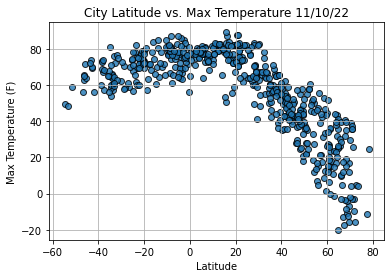

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

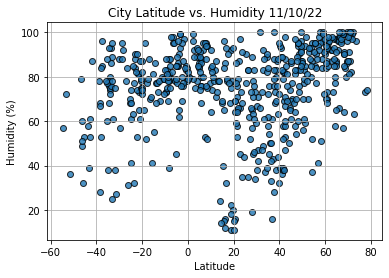

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

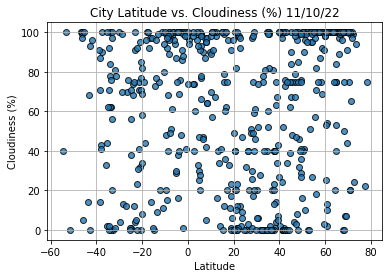

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

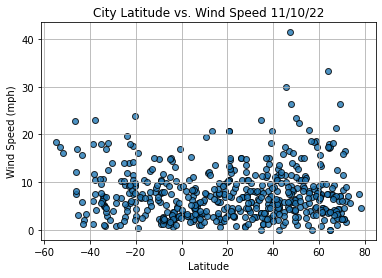

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()